In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# upload dataframe files
application_record = pd.read_csv(r'C:\Users\Cesar.Zambrano\OneDrive - Bentley Systems, Inc\Desktop\Documents\Documents\Cesar Zambrano\Data Analytics Course\Materials\UCD\Project\Databases\credit card approval\application_record.csv')
credit_record= pd.read_csv(r'C:\Users\Cesar.Zambrano\OneDrive - Bentley Systems, Inc\Desktop\Documents\Documents\Cesar Zambrano\Data Analytics Course\Materials\UCD\Project\Databases\credit card approval\credit_record.csv')

In [3]:
# check the first file
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
# check second file
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
#info for both files
application_record.info()
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
# clear summary of total rows and columns
print(application_record.shape,credit_record.shape)

(438557, 18) (1048575, 3)


In [7]:
#look up for missing values
application_record.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
credit_record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [9]:
# convert column DAYS_BIRTH into Age(+years)
application_record ['DAYS_BIRTH'] = -(application_record['DAYS_BIRTH'])/365
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-3051,1,0,1,1,Sales staff,1.0


In [10]:
# convert column DAYS_EMPLOYED into years (negative numbers mean non employed from now on)
application_record ['DAYS_EMPLOYED'] = -(application_record['DAYS_EMPLOYED'])/365
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0


In [11]:
# rename columns to understand better the data
application_record.rename(columns = {'CODE_GENDER':'Gender', 'FLAG_OWN_CAR':'Own_Car','FLAG_OWN_REALTY':'Realty',
                                    'CNT_CHILDREN':'ChildrenNo','AMT_INCOME_TOTAL':'Annual_Income',
                                    'NAME_INCOME_TYPE':'Income_Type','NAME_EDUCATION_TYPE':'Education',
                                     'NAME_FAMILY_STATUS':'Marital_Status','NAME_HOUSING_TYPE':'Housing_Type',
                                     'DAYS_BIRTH':'Age','DAYS_EMPLOYED':'Start_Employement','FLAG_MOBIL':'Mobile',
                                     'FLAG_WORK_PHONE':'Work_Phone','FLAG_PHONE':'Phone','FLAG_EMAIL':'Email',
                                     'OCCUPATION_TYPE':'Occupation','CNT_FAM_MEMBERS':'Family_Size' }, inplace = True)

In [12]:
application_record.head()

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Mobile,Work_Phone,Phone,Email,Occupation,Family_Size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0


In [13]:
# replace occupation NaN with "other"
application_record[['Occupation']]= application_record[['Occupation']].fillna('Other')
application_record.head()

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Mobile,Work_Phone,Phone,Email,Occupation,Family_Size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Other,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Other,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0


In [14]:
#look up for missing values again
application_record.isna().sum()

ID                   0
Gender               0
Own_Car              0
Realty               0
ChildrenNo           0
Annual_Income        0
Income_Type          0
Education            0
Marital_Status       0
Housing_Type         0
Age                  0
Start_Employement    0
Mobile               0
Work_Phone           0
Phone                0
Email                0
Occupation           0
Family_Size          0
dtype: int64

In [15]:
# value count of different type of occupation in application record
application_record['Occupation'].value_counts()

Other                    134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: Occupation, dtype: int64

In [16]:
#rename columns names in second dataframe
credit_record.rename(columns= {'MONTHS_BALANCE':'Months_Balance' , 'STATUS':'Status'}, inplace= True)
credit_record.head()

,ID,Months_Balance,Status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [17]:
credit_record['Status'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: Status, dtype: int64

Text(0.5, 1.0, 'Credit Record Status by Number of Months')

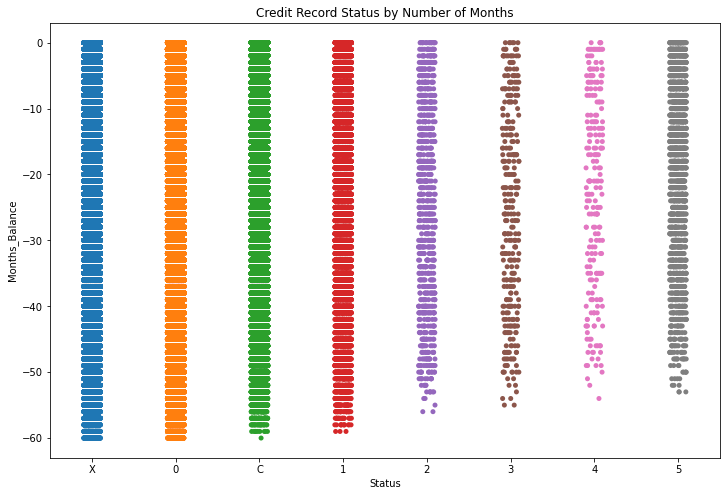

In [19]:
# graph overview to visualize if there is clear correlation between bad ratings and the number of months since credit was granted
plt.figure(figsize=(12, 8))
sns.stripplot(x=credit_record['Status'], y=credit_record['Months_Balance'])
plt.title('Credit Record Status by Number of Months')

In [20]:
# Status of credit will be defined as <30 days is good and => 30 days is risky or bad for analysis
# status = Good (X, C, 0 - Good Rating) the account has paid their debt under 30 days or there is no current credit.
# status = Bad (1,2,3,4,5 - bad or risky rating) the account has not paid their debt after 30 days.
credit_record['Status'].replace({'X':'Good'},inplace=True)
credit_record['Status'].replace({'C':'Good'},inplace=True)
credit_record['Status'].replace({'0':'Good'},inplace=True)
credit_record['Status'].replace({'1':'Bad'},inplace=True)
credit_record['Status'].replace({'2':'Bad'},inplace=True)
credit_record['Status'].replace({'3':'Bad'},inplace=True)
credit_record['Status'].replace({'4':'Bad'},inplace=True)
credit_record['Status'].replace({'5':'Bad'},inplace=True)

In [21]:
credit_record

,ID,Months_Balance,Status
0,5001711,0,Good
1,5001711,-1,Good
2,5001711,-2,Good
3,5001711,-3,Good
4,5001712,0,Good
...,...,...,...
1048570,5150487,-25,Good
1048571,5150487,-26,Good
1048572,5150487,-27,Good
1048573,5150487,-28,Good


In [22]:
credit_record['Status'].value_counts()

Good    1034381
Bad       14194
Name: Status, dtype: int64

In [23]:
# percentage of status
status_perc = credit_record['Status'].value_counts(normalize=True)*100
status_perc

Good    98.646353
Bad      1.353647
Name: Status, dtype: float64

In [24]:
# number of total people by Gender in application record
application_record['Gender'].value_counts()

F    294440
M    144117
Name: Gender, dtype: int64

In [25]:
gender_perc = application_record['Gender'].value_counts(normalize=True) * 100
gender_perc

F    67.138365
M    32.861635
Name: Gender, dtype: float64

In [26]:
# number of total IDs in application_record
len(application_record['ID'])

438557

In [27]:
# number of total IDs in credit_record
len(credit_record['ID'])

1048575

In [28]:
# number of unique IDs in application_record
len(set(application_record['ID']))

438510

In [29]:
# number of unique IDs in credit_record
len(set(credit_record['ID']))

45985

In [30]:
# number of IDs application_record and credit_record share
len(set(application_record['ID']).intersection(set(credit_record['ID'])))

36457

In [31]:
# number of duplicated IDs
application_record.duplicated('ID').sum()

47

In [32]:
# drop duplicated ID
application_record.drop_duplicates(subset= ['ID'])

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Mobile,Work_Phone,Phone,Email,Occupation,Family_Size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Other,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Other,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62.238356,-1000.665753,1,0,0,0,Other,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,43.668493,8.238356,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22.380822,1.019178,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59.378082,-1000.665753,1,0,0,0,Other,2.0


In [33]:
# merge dataframes by ID. Only IDs that are in both databases will remain which are the ones with relevant information to work with
totaldf = pd.merge(application_record, credit_record , on= 'ID')
totaldf.head()

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Mobile,Work_Phone,Phone,Email,Occupation,Family_Size,Months_Balance,Status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Other,2.0,0,Good
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Other,2.0,-1,Good
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Other,2.0,-2,Good
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Other,2.0,-3,Good
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,Other,2.0,-4,Good


In [34]:
# drop columns that will not be useful for analysis
totaldf.drop(['Mobile','Work_Phone','Phone','Email'], axis=1, inplace=True)

In [35]:
totaldf.head()

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Occupation,Family_Size,Months_Balance,Status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,0,Good
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,-1,Good
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,-2,Good
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,-3,Good
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,-4,Good


In [36]:
totaldf.shape

(777715, 16)

In [37]:
# total number of unique IDs in full dataframe. Matches with previous calculation
len(set(totaldf['ID']))

36457

In [38]:
totaldf['Status'].value_counts()

Good    766140
Bad      11575
Name: Status, dtype: int64

In [39]:
statustotal_perc = totaldf['Status'].value_counts(normalize=True)*100
statustotal_perc

Good    98.511666
Bad      1.488334
Name: Status, dtype: float64

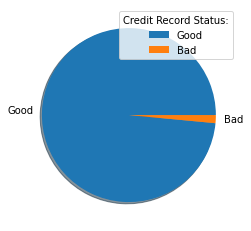

In [40]:
# pie chart of status dist
mylabels = ['Good' , 'Bad']
plt.pie(statustotal_perc, labels=mylabels, shadow=True)
plt.legend(title = "Credit Record Status:")
plt.show()

In [42]:
# mean income by gender
Gender_Income=totaldf.groupby('Gender')['Annual_Income'].mean()
Gender_Income

Gender
F    173899.656380
M    217868.583436
Name: Annual_Income, dtype: float64

In [47]:
# median income by gender
totaldf.groupby('Gender')['Annual_Income'].median()

Gender
F    157500.0
M    202500.0
Name: Annual_Income, dtype: float64

In [48]:
# mean annual income full
np.mean(totaldf['Annual_Income'])

188534.80207402454

In [49]:
# median annual income full
np.median(totaldf['Annual_Income'])

162000.0

In [50]:
df_inc_age_fam = totaldf[['Annual_Income','Age','Family_Size']]
df_inc_age_fam.describe() # overview of annual income, age and family size of total dataframe

,Annual_Income,Age,Family_Size
count,7.777150e+05,777715.000000,777715.000000
mean,1.885348e+05,44.177910,2.208837
std,1.016225e+05,11.244669,0.907380
min,2.700000e+04,20.517808,1.000000
25%,1.215000e+05,34.838356,2.000000
50%,1.620000e+05,43.178082,2.000000
75%,2.250000e+05,53.295890,3.000000
max,1.575000e+06,68.909589,20.000000


In [54]:
# sublist of only bad status mix above/blow mean for income, age and gender
younger_bad= totaldf[np.logical_and(totaldf['Age'] <= 44, totaldf["Status"] == 'Bad')]
younger_bad


,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Occupation,Family_Size,Months_Balance,Status
13,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,-13,Bad
28,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,-12,Bad
301,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,Accountants,2.0,-20,Bad
325,5008826,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,Accountants,2.0,-19,Bad
326,5008826,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,Accountants,2.0,-20,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777687,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,Medicine staff,2.0,-29,Bad
777688,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,Medicine staff,2.0,-30,Bad
777689,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,Medicine staff,2.0,-31,Bad
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,-10,Bad


In [71]:
young=younger_bad['ID'].count()
print('Number of applicants below mean Age with bad rating:'+ str(young))

Number of applicants below mean Age with bad rating:6522


In [58]:
older_bad=totaldf[np.logical_and(totaldf['Age'] > 44, totaldf["Status"] == 'Bad')]
older_bad

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Occupation,Family_Size,Months_Balance,Status
962,5008872,M,Y,Y,0,360000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,45.671233,14.695890,Security staff,2.0,-8,Bad
2538,5008975,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,-1000.665753,Other,2.0,-36,Bad
2543,5008975,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,-1000.665753,Other,2.0,-41,Bad
2586,5008978,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,-1000.665753,Other,2.0,-25,Bad
2591,5008978,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,-1000.665753,Other,2.0,-30,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777623,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,47.528767,6.630137,Managers,2.0,-1,Bad
777624,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,47.528767,6.630137,Managers,2.0,-2,Bad
777627,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,47.528767,6.630137,Managers,2.0,-5,Bad
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.200000,1.794521,Sales staff,2.0,0,Bad


In [72]:
older=older_bad['ID'].count()
print('Number of applicants above mean Age with bad rating:'+ str(older))

Number of applicants above mean Age with bad rating:5053


In [81]:
# for purposes of better managing of data we will create a single entry for Month_Balance
# group Months_Balance by the lowest number which in this case mean the furthest month in database for credit records
# since we do not really need each month record but an overall view we can create a field representing the total months 
# account has been active with credit record
monthdf = pd.DataFrame(totaldf.groupby(['ID'])['Months_Balance'].agg(min)).reset_index()

In [82]:
monthdf.head()

,ID,Months_Balance
0,5008804,-15
1,5008805,-14
2,5008806,-29
3,5008808,-4
4,5008809,-26


In [83]:
#convert Months_Balance to a positive number
monthdf['Months_Balance'] = - monthdf['Months_Balance']
monthdf

,ID,Months_Balance
0,5008804,15
1,5008805,14
2,5008806,29
3,5008808,4
4,5008809,26
...,...,...
36452,5150482,28
36453,5150483,17
36454,5150484,12
36455,5150485,1


In [84]:
#Merge the newly created df based on higher number of months to the total df based on ID
#Drrop the other column of Months_Balance (the original one)
#Remove duplicates. This should give the final dataframe of only "Total Months" and keep the status

newtotal_df = pd.merge(totaldf,monthdf,on=['ID'])

newtotal_df

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Occupation,Family_Size,Months_Balance_x,Status,Months_Balance_y
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,0,Good,15
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,-1,Good,15
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,-2,Good,15
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,-3,Good,15
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,-4,Good,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,-9,Good,13
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,-10,Bad,13
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,-11,Bad,13
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,-12,Good,13


In [85]:
newtotal_df.drop('Months_Balance_x', axis=1, inplace=True)
newtotal_df.drop_duplicates()

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Occupation,Family_Size,Status,Months_Balance_y
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Good,15
13,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Bad,15
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Good,14
28,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Bad,14
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,Security staff,2.0,Good,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777672,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,Medicine staff,2.0,Bad,32
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.200000,1.794521,Sales staff,2.0,Bad,9
777693,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.200000,1.794521,Sales staff,2.0,Good,9
777701,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,Good,13


In [86]:
#Rename column Months_Balance to Months. This column represents the total leght of since credit was grantes in Months
newtotal_df.rename(columns={ 'Months_Balance_y' : 'Months' } ,inplace=True)

In [90]:
newtotal_df

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Occupation,Family_Size,Status,Months
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Good,15
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Good,15
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Good,15
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Good,15
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Good,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,Good,13
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,Bad,13
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,Bad,13
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,Good,13


In [92]:
finaldf=newtotal_df.drop_duplicates()
finaldf

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Occupation,Family_Size,Status,Months
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Good,15
13,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Bad,15
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Good,14
28,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Bad,14
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,Security staff,2.0,Good,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777672,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,Medicine staff,2.0,Bad,32
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.200000,1.794521,Sales staff,2.0,Bad,9
777693,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.200000,1.794521,Sales staff,2.0,Good,9
777701,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25.172603,3.268493,Laborers,1.0,Good,13


In [93]:
# total number of unique IDs in full dataframe. Matches with previous calculation
len(set(finaldf['ID']))

36457

In [97]:
#sublist of only bad scores
bad_df=finaldf[(finaldf['Status']=='Bad')]
bad_df

,ID,Gender,Own_Car,Realty,ChildrenNo,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Start_Employement,Occupation,Family_Size,Status,Months
13,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Bad,15
28,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,Other,2.0,Bad,14
301,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,Accountants,2.0,Bad,25
325,5008826,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,Accountants,2.0,Bad,30
354,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,Laborers,2.0,Bad,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,47.528767,6.630137,Managers,2.0,Bad,11
777639,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,33.936986,3.630137,Medicine staff,2.0,Bad,23
777672,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,Medicine staff,2.0,Bad,32
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.200000,1.794521,Sales staff,2.0,Bad,9


In [99]:
bad_df['Months'].value_counts()

10    104
39    103
23    100
11    100
16     98
     ... 
58     37
3      31
2      24
1      11
0       1
Name: Months, Length: 61, dtype: int64

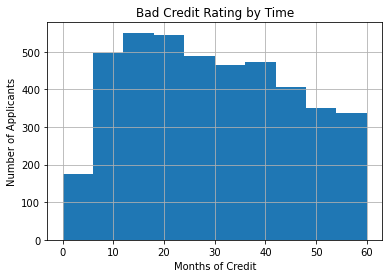

In [106]:
#graph to visualize amount of months more likely to incurr in bad rating
bad_df.hist(column='Months')
plt.xlabel('Months of Credit')
plt.ylabel('Number of Applicants')
plt.title('Bad Credit Rating by Time')
plt.show()

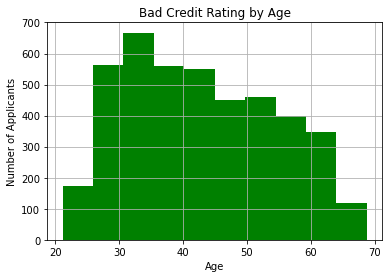

In [115]:
bad_df.hist(column='Age', color = "green")
plt.xlabel('Age')
plt.ylabel('Number of Applicants')
plt.title('Bad Credit Rating by Age')
plt.show()

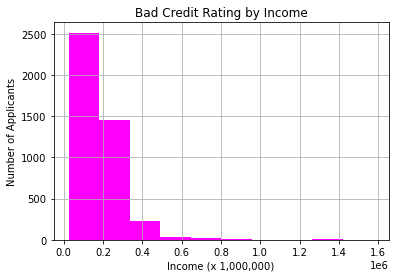

In [133]:
bad_df.hist(column='Annual_Income', color = 'magenta')
plt.xlabel('Income (x 1,000,000)')
plt.ylabel('Number of Applicants')
plt.title('Bad Credit Rating by Income')
plt.show()

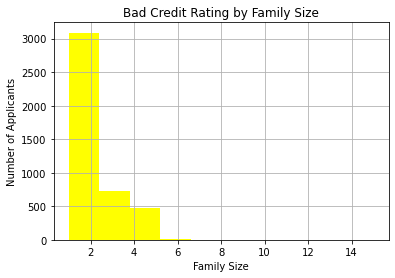

In [137]:
bad_df.hist(column='Family_Size', color='yellow')
plt.xlabel('Family Size')
plt.ylabel('Number of Applicants')
plt.title('Bad Credit Rating by Family Size')
plt.show()

In [109]:
Gender_bad=bad_df['Gender'].value_counts(normalize=True) * 100
Gender_bad

F    64.274062
M    35.725938
Name: Gender, dtype: float64

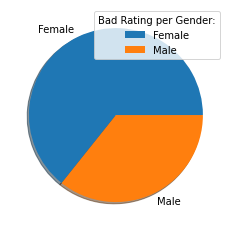

In [110]:
# Bad Status per gender
mylabels = ['Female' , 'Male']
plt.pie(Gender_bad, labels=mylabels, shadow=True)
plt.legend(title = "Bad Rating per Gender:")
plt.show()